In [46]:
import pandas as pd

import cv2
import numpy as np
import matplotlib.pyplot as plt

import geopandas as gdf
from shapely.geometry import Point, Polygon



%matplotlib inline


df_plants = pd.read_excel(open('egrid2016_data.xlsx', 'rb'), sheet_name='PLNT16', header=1,index_col=[0])


Plants percentage 1.54%
Plants count : 150


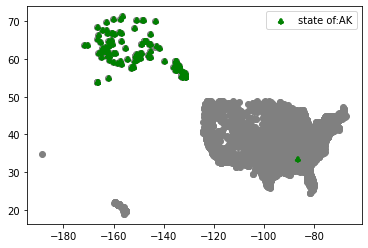

In [248]:

# goup by state

state_code = 'AK'
pl_by_state_df = df_plants.groupby("PSTATABB")
result = pl_by_state_df.get_group(state_code)

# state geometry point
states_filter = gdf.GeoDataFrame(result, geometry=gdf.points_from_xy(result.LON, result.LAT))



# glob geometry point geo frame
states = gdf.GeoDataFrame(df_plants, geometry=gdf.points_from_xy(df_plants.LON, df_plants.LAT))


states_filter.reset_index(drop=True, inplace=True)
states.reset_index(drop=True, inplace=True)



percentage = (result["PSTATABB"].count() / len(df_plants)) 
plants_number = result["PSTATABB"].count()


print("Plants percentage {:.2%}".format(percentage))
print("Plants count :", plants_number)

fig, ax = plt.subplots()

polygon_geom = zip(states["LON"].values, states["LAT"].values)
x, y = zip(*polygon_geom)

plt.scatter(x, y, color="gray")

polygon_states = zip(states_filter["LON"].values, states_filter["LAT"].values)
x, y = zip(*polygon_states)
plt.scatter(x, y , label="state of:{0}".format(state_code),color="green", marker=r'$\clubsuit$')



ax.legend()



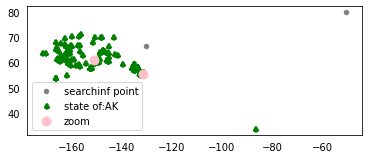

In [259]:
# zoom into map
# params
lat1 = 55.37975;
lng1 = -131.470269;
      
lat2 = 61.1861;
lng2 = -151.0356;


lat3 = 66.5357;
lng3 = -130.2123;

lat4 = 80.106432;
lng4 = -50.43074;


p1 = Point(lng1,lat1)
p2 = Point(lng2,lat2)
p3 = Point(lng3,lat3)
p4=Point(lng4,lat4)

points = gdf.GeoDataFrame(geometry=[p1,p2,p3,p4])

coords = [p1, p2, p3,p4]

poly = Polygon(coords)





result_gdf = gdf.sjoin(points,states,  how="inner", op='intersects')


fig, ax = plt.subplots()

ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')


points.plot(ax=ax , color="gray", markersize=20, label="searchinf point")
plt.scatter(x, y , label="state of:{0}".format(state_code),color="green", marker=r'$\clubsuit$')

if len(result_gdf):
    result_gdf.plot(ax=ax, color="pink", label="zoom",markersize=80 )

ax.legend()



In [255]:
result_gdf

,geometry,index_right,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,BANAME,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
0,POINT (-131.47027 55.37975),13,AK,Beaver Falls,6580,Ketchikan Public Utilities,10210,Ketchikan Public Utilities,10210,Alaska Miscellaneous,...,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0
1,POINT (-151.03560 61.18610),14,AK,Beluga,96,Chugach Electric Assn Inc,3522,Chugach Electric Assn Inc,3522,Chugach Electric Assn Inc,...,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,0.0
